# IPython Notebook to animate the results provided by our solver of the time-dependent Schroedinger equation for a quantum mechanical point particle

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

## Set the path/ filename of the file the contains the evolution of the wave function and the file that contains the potential here

In [2]:
inputfilePath = 'perf_test_output.txt'

## Read the data from the files and save it in lists of floats

In [39]:
perfData = [] #Array to save the imaginary part of the wave functions
with open(inputfilePath,'r') as inputfile:
    for line in inputfile:
        perfData.append(line.strip().split('\t'))
    legends = perfData[0]
    del perfData[0]
    for j in range(len(perfData)):
        perfData[j] = [float(perfData[j][i]) for i in range(len(perfData[0]))]
    perfData = np.array(perfData).T

## Find the absolute maximum of the times to use it as the y- maximum of the plot

In [40]:
maximum = 0.0 #Initialise a variable to store the absolute maximum of all wave functions

for i in range(len(perfData)): #Iterate over all time steps
    if max(perfData[i]) > maximum: #If the maximum in the current time step is bigger than the maximum up to here...
        maximum = max(perfData[i]) #...set it as the new maximum

## Generate a series of plots that is shown over time. Each plot contains the wave function at consecutive points in the simulation

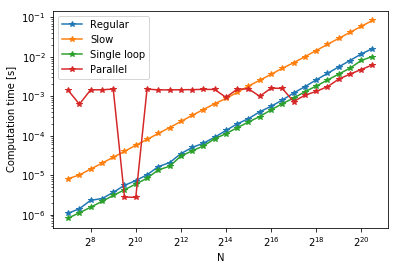

In [41]:
x = perfData[0]

for i in range(1,5):
    plt.loglog(x,perfData[i], label="%s"%legends[i], marker="*", basex=2)

plt.xlabel("N")
plt.ylabel("Computation time [s]")
plt.legend()
plt.show()

## Graphical output of the observables
### Valid values for obs are:
###    - "norm-1"  to display the time evolution of the normalisation minus 1
###    - "energy"  to display the time evolution of the energy expectation value
###    - "x"  to display the time evolution of the spacial coordinate expectation value
###    - "p"  to display the time evoltuion of the momentum expectation value
###    - "delta-x"  to display the width of the wave in real space
###    - "delta-p"  to display the width of the wave in momentum space

In [6]:
obs = "energy" # Set the requested observable to plot here

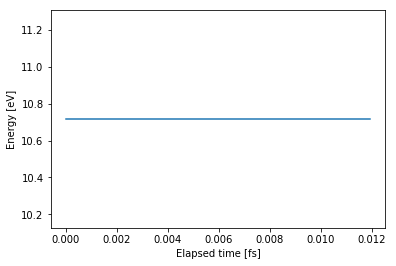

In [7]:
if(obs == "norm-1"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[1])
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("Absolute deviation from 1")
    plt.show()
    
elif(obs == "energy"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[2]*epsilon/e)
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("Energy [eV]")
    plt.show()
    
elif(obs == "x"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[3]*a*1e10)
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("x expectation value [Å]")
    plt.show()
    
elif(obs == "p"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[4]*hbar/a)
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("p expectation value [kg*m/s]")
    plt.show()
    
elif(obs == "delta-x"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[5]*a*1e10)
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("x width of the wave function [Å]")
    plt.show()
    
elif(obs == "delta-p"):
    plt.plot(obsData[0]*tauhat/omega*1e15,obsData[6]*hbar/a)
    plt.xlabel("Elapsed time [fs]")
    plt.ylabel("momentum width of the wave function [kg*m/s]")
    plt.show()
    
else:
    print("Invalid value!")